In [0]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from scipy import stats

# import cross validation and other evaluation tool 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# ??
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt

# set display options
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 300
%matplotlib inline
fig=plt.figure(figsize=(18,6))

<Figure size 1296x432 with 0 Axes>

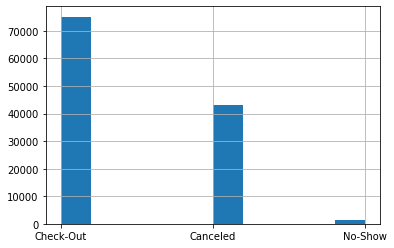

In [0]:
data = pd.read_csv("Hotel_Bookings_Prepared.csv", index_col = "Unnamed: 0")
data['reservation_status'].hist()

In [0]:
data.columns.values

array(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'country', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'agent', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_company',
       'is_agent', 'is_diff_room_type', 'arrival_date_day_of_the_week',
       'hotel_encoded', 'arrival_date_month_encoded', 'meal_encoded',
       'market_segment_encoded', 'distribution_channel_encoded',
       'customer_type_encoded', 'deposit_type_encoded',
       'hotel_City Hotel', 'hotel_Resort Hotel',
       'arrival_date_month_April', 'arrival_date_month_August',
       'arrival_date_month_December', 'arri

In [0]:
# features = list(data.columns.values)
# to_be_removed = ['is_canceled','arrival_date_year','arrival_date_week_number',
#                  'arrival_date_day_of_month','country','reserved_room_type', 
#                  'assigned_room_type','agent', 'company','reservation_status', 
#                  'reservation_status_date','arrival_date_day_of_the_week','is_repeated_guest']
# for feature in to_be_removed:
#     features.remove(f"{feature}")
features = ['lead_time', \
 'stays_in_weekend_nights', \
 'stays_in_week_nights', \
 'adults', \
 'children', \
 'babies', \
 'previous_cancellations', \
 'previous_bookings_not_canceled', \
 'booking_changes', \
 'days_in_waiting_list', \
 'adr', \
 'required_car_parking_spaces', \
 'total_of_special_requests', \
 'is_company', \
 'is_agent', \
 'is_diff_room_type', \
 'hotel_encoded', \
 'arrival_date_month_encoded', \
 'meal_encoded', \
 'market_segment_encoded', \
 'distribution_channel_encoded', \
 'customer_type_encoded', \
 'deposit_type_encoded', \
 'hotel_City Hotel', \
 'hotel_Resort Hotel', \
 'continent_encoded']

In [0]:
# define model features and label
X = data[features]
# change target column to array
y = data['is_canceled'].values.ravel()

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [0]:
#Import Multinomial Naive Bayes model from sklearn
from sklearn.naive_bayes import MultinomialNB

#Create a Multinomial Bayes Classifier
mnb = MultinomialNB()

In [0]:
pred_y = cross_val_predict(mnb,X_train,y_train,cv=10)
pred_proba = cross_val_predict(mnb, X_train,y_train,cv=10, method = 'predict_proba')

In [0]:
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# y_pred_prob = the probabilistic predictions
y_pred_prob = mnb.predict_proba(X_test)
y_pred_prob

array([[0.99262325, 0.00737675],
       [0.97740031, 0.02259969],
       [0.99768472, 0.00231528],
       ...,
       [0.97799883, 0.02200117],
       [0.99225806, 0.00774194],
       [0.98803175, 0.01196825]])

In [0]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob[:,1],pos_label=1)

In [0]:
metrics.auc(fpr, tpr)

0.833463908376741

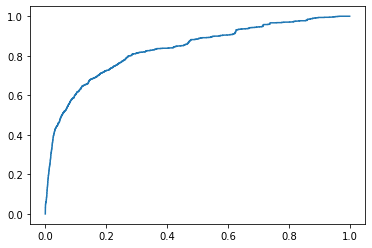

In [0]:
plt.plot(fpr,tpr)